In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\BCW\BCW_NG_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.0,1.0,1.0,1,2.0,1.0,3.0,1.0,1.0
1,5.0,4.0,4.0,5,7.0,10.0,3.0,2.0,1.0
2,3.0,1.0,1.0,1,2.0,2.0,3.0,1.0,1.0
3,6.0,8.0,8.0,1,3.0,4.0,3.0,7.0,1.0
4,4.0,1.0,1.0,3,2.0,1.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
678,3.0,1.0,1.0,1,2.0,1.0,2.0,1.0,1.0
679,2.0,1.0,1.0,1,NaN,1.0,3.0,1.0,1.0
680,5.0,10.0,10.0,10,4.0,10.0,5.0,6.0,3.0
681,1.0,1.0,1.0,3,2.0,1.0,1.0,1.0,1.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	6
float64		column 2	18
float64		column 3	9
int64		column 4	0
float64		column 5	6
float64		column 6	3
float64		column 7	6
float64		column 8	3
float64		column 9	3


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,677.000000,665.000000,674.000000,683.000000,677.000000,680.000000,677.000000,680.000000,680.000000
mean,4.450517,3.109774,3.204748,2.830161,3.242245,3.542647,3.450517,2.866176,1.600000
std,2.812060,3.038158,2.979809,2.864562,2.228205,3.640867,2.447554,3.048654,1.731285
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

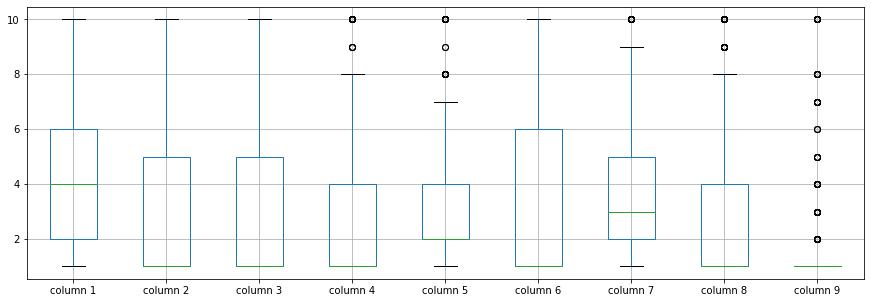

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    4.450517
column 2    3.109774
column 3    3.204748
column 4    2.830161
column 5    3.242245
column 6    3.542647
column 7    3.450517
column 8    2.866176
column 9    1.600000
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,0.636400,0.651004,0.493937,0.520517,0.591709,0.557313,0.543388,0.349822
column 2,0.636400,1.000000,0.905184,0.701762,0.760710,0.690825,0.754127,0.729481,0.461810
column 3,0.651004,0.905184,1.000000,0.681941,0.723828,0.708637,0.733003,0.712412,0.445734
column 4,0.493937,0.701762,0.681941,1.000000,0.593352,0.668847,0.669299,0.605306,0.416204
column 5,0.520517,0.760710,0.723828,0.593352,1.000000,0.583512,0.617783,0.627696,0.489415
column 6,0.591709,0.690825,0.708637,0.668847,0.583512,1.000000,0.675765,0.582033,0.330705
column 7,0.557313,0.754127,0.733003,0.669299,0.617783,0.675765,1.000000,0.667797,0.343034
column 8,0.543388,0.729481,0.712412,0.605306,0.627696,0.582033,0.667797,1.000000,0.432443
column 9,0.349822,0.461810,0.445734,0.416204,0.489415,0.330705,0.343034,0.432443,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+26,9+26+26,9+26+26,9+26+26+26+26,9+26+26+26+26+26,9+26+26+26+26+26+26,9+26+26+26+26+26,9+26+26+26+26,9+26+26+26,9+26+26,9+26,9], vae_layer = False, seed = 260)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 36.66418815794445
Epoch: 1 , loss: 36.11233715783982
Epoch: 2 , loss: 36.256940432957244
Epoch: 3 , loss: 35.809686842418856
Epoch: 4 , loss: 35.23456925437564
Epoch: 5 , loss: 33.482295127142045
Epoch: 6 , loss: 32.83775061652774
Epoch: 7 , loss: 32.52622095743815
Epoch: 8 , loss: 32.02651823134649
Epoch: 9 , loss: 32.05117443629673
Epoch: 10 , loss: 31.325605574108305
Epoch: 11 , loss: 31.1480959937686
Epoch: 12 , loss: 30.646604810442245
Epoch: 13 , loss: 30.317816598074778
Epoch: 14 , loss: 30.135715393793014
Epoch: 15 , loss: 29.828520820254372
Epoch: 16 , loss: 29.5456082934425
Epoch: 17 , loss: 28.991325650896346
Epoch: 18 , loss: 28.61121618180048
Epoch: 19 , loss: 28.34042453765869
Epoch: 20 , loss: 28.558040301005047
Epoch: 21 , loss: 28.545943351018998
Epoch: 22 , loss: 28.56146303812663
Epoch: 23 , loss: 27.598222687130882
Epoch: 24 , loss: 27.939588001796178
Epoch: 25 , loss: 27.52482237134

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(683, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    3.0
column 2    1.0
column 3    1.0
column 4    1.0
column 5    2.0
column 6    1.0
column 7    2.0
column 8    1.0
column 9    1.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\BCW.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.0,0.0,0.0,0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
678,0.0,0.0,0.0,0,0.000000,0.0,0.0,0.0,0.0
679,0.0,0.0,0.0,0,0.475001,0.0,0.0,0.0,0.0
680,0.0,0.0,0.0,0,0.000000,0.0,0.0,0.0,0.0
681,0.0,0.0,0.0,0,0.000000,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(22.71764247023704, 335.3281974424459)

In [17]:
NRMS=numerator/denominator
NRMS


0.06774748632386092

In [18]:
new_df.iloc[66,:]

column 1    1.0
column 2    3.0
column 3    3.0
column 4    2.0
column 5    2.0
column 6    1.0
column 7    7.0
column 8    2.0
column 9    1.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.0,1.0,1.0,1,2.000000,1.0,3.0,1.0,1.0
1,5.0,4.0,4.0,5,7.000000,10.0,3.0,2.0,1.0
2,3.0,1.0,1.0,1,2.000000,2.0,3.0,1.0,1.0
3,6.0,8.0,8.0,1,3.000000,4.0,3.0,7.0,1.0
4,4.0,1.0,1.0,3,2.000000,1.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
678,3.0,1.0,1.0,1,2.000000,1.0,2.0,1.0,1.0
679,2.0,1.0,1.0,1,2.475001,1.0,3.0,1.0,1.0
680,5.0,10.0,10.0,10,4.000000,10.0,5.0,6.0,3.0
681,1.0,1.0,1.0,3,2.000000,1.0,1.0,1.0,1.0


In [20]:
imputations[-1].to_excel("BCW_NG_1(imp).xlsx", index=False, header=False)